 # Stores Sales Forecasting

In [68]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#### unzip the dataset

In [ ]:
!cd walmart-recruiting-store-sales-forecasting/

In [10]:
!unzip walmart-recruiting-store-sales-forecasting/train.csv.zip

Archive:  walmart-recruiting-store-sales-forecasting/train.csv.zip
  inflating: train.csv               


In [12]:
!unzip walmart-recruiting-store-sales-forecasting/test.csv.zip

Archive:  walmart-recruiting-store-sales-forecasting/test.csv.zip
  inflating: test.csv                


In [13]:
!unzip walmart-recruiting-store-sales-forecasting/features.csv.zip

Archive:  walmart-recruiting-store-sales-forecasting/features.csv.zip
  inflating: features.csv            


In [14]:
!unzip walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip

Archive:  walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    


### Understand and explore the Data

**Stores**: Type and size of each store

In [69]:
stores = pd.read_csv('stores.csv')

print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


**Train**: Historical sales data including store, department, date, weekly sales, and holiday indicator.

In [70]:
train = pd.read_csv('train.csv')

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


**Test**: Similar to train but without the Weekly_Sales.

In [71]:
test = pd.read_csv('test.csv')

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None


**Features**: Contains additional information such as temperature, fuel price, markdowns, CPI, unemployment, and holiday indicator.

In [72]:
features = pd.read_csv('features.csv')

print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [28]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [29]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [30]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [73]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Handle missing values

In [74]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [75]:
train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [76]:
test.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [77]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

While mean imputation is simple, it can reduce the variance in your data and potentially underestimate the uncertainty in your predictions. 

In [36]:
numerical_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

for column in numerical_columns:
    mean_value = features[column].mean()
    features[column].fillna(mean_value, inplace=True)

features.isnull().sum()

/var/folders/t9/2w32j6693bgcszqz42m0h9k00000gn/T/ipykernel_4357/2178962150.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[column].fillna(mean_value, inplace=True)


Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

Using K-Nearest Neighbors (KNN) for imputation is a more sophisticated approach that can potentially capture more complex relationships in your data.

The scaler, specifically the StandardScaler from scikit-learn, performs standardization on the data. This operation is important for KNN imputation for several reasons. Let's break it down:
What StandardScaler does:

1. For each feature, it calculates the mean (μ) and standard deviation (σ) of the values.
2. It then transforms each value (x) using the formula: (x - μ) / σ

This transformation results in each feature having a mean of 0 and a standard deviation of 1.

Why scaling is needed for KNN imputation:

1. Equal feature importance: KNN uses distances between data points to determine "nearest neighbors". Without scaling, features with larger magnitudes would dominate the distance calculations. 
2. Improved accuracy: By standardizing, we ensure that all features contribute equally to the distance calculations, which generally leads to more accurate imputation.
3. Algorithm assumptions: Many machine learning algorithms, including KNN, assume that all features are on a similar scale. Standardization helps meet this assumption.
4. Numerical stability: Some algorithms can face numerical instability or slow convergence when features are on very different scales. Standardization helps mitigate these issues.

After imputation, we use inverse_transform() to convert the data back to its original scale, ensuring that our imputed values are in the same range as the original data.

In [78]:
# Assuming 'features' is your DataFrame
numerical_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

# Create a copy of the numerical columns
features_numeric = features[numerical_columns].copy()

# Standardize the features (important for KNN)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_numeric)

# Create and fit the KNN imputer
imputer = KNNImputer(n_neighbors=5)  
features_imputed = imputer.fit_transform(features_scaled)

# Convert back to original scale
features_imputed = scaler.inverse_transform(features_imputed)

# Create a new DataFrame with the imputed values
features_imputed_df = pd.DataFrame(features_imputed, columns=numerical_columns, index=features.index)

# Replace the original columns with the imputed ones
features[numerical_columns] = features_imputed_df

# Check for any remaining null values
print(features[numerical_columns].isnull().sum())

MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


#### Feature Engineering

In [79]:
# first merge train, features and stores data
features_stores = features.merge(stores, how='inner', on='Store')
features_stores.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,5427.498,1311.012,11515.138,1713.214,9606.41,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,5427.498,1311.012,11515.138,1713.214,9606.41,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,5427.498,1311.012,11515.138,1713.214,9606.41,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,5427.498,1311.012,11515.138,1713.214,9606.41,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,5427.498,1311.012,11515.138,1713.214,9606.41,211.350143,8.106,False,A,151315


In [80]:
train_merged = train.merge(features_stores, how='inner', on=['Store', 'Date', 'IsHoliday'])
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,5427.498,1311.012,11515.138,1713.214,9606.41,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,5427.498,1311.012,11515.138,1713.214,9606.41,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,5427.498,1311.012,11515.138,1713.214,9606.41,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,5427.498,1311.012,11515.138,1713.214,9606.41,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,5427.498,1311.012,11515.138,1713.214,9606.41,211.350143,8.106,A,151315


In [81]:
# prepare also for test
test_merged = test.merge(features_stores, how='inner', on=['Store', 'Date', 'IsHoliday'])
test_merged.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.700,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.890,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.100,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.170,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,485.072,3838.35,150.57,6966.34,223.610984,6.573,A,151315


extract year, month, week and day and create new column for them

In [82]:
# Convert 'Date' column to datetime format
train_merged['Date'] = pd.to_datetime(train_merged['Date'])

# Extract date features
train_merged['Year'] = train_merged['Date'].dt.year
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Week'] = train_merged['Date'].dt.isocalendar().week
train_merged['DayOfWeek'] = train_merged['Date'].dt.dayofweek  

train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,2010-02-05,24924.50,False,42.31,2.572,5427.498,1311.012,11515.138,1713.214,9606.41,211.096358,8.106,A,151315,2010,2,5,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,5427.498,1311.012,11515.138,1713.214,9606.41,211.242170,8.106,A,151315,2010,2,6,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,5427.498,1311.012,11515.138,1713.214,9606.41,211.289143,8.106,A,151315,2010,2,7,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,5427.498,1311.012,11515.138,1713.214,9606.41,211.319643,8.106,A,151315,2010,2,8,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,5427.498,1311.012,11515.138,1713.214,9606.41,211.350143,8.106,A,151315,2010,3,9,4


In [43]:
# Lag Features: Create lagged features for sales to capture trends

# Define the number of lag weeks
num_lags = 4

for i in range(1, num_lags + 1):
    train_merged[f'Weekly_Sales_Lag{i}'] = train_merged.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(i)

train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Year,Month,Week,DayOfWeek,Weekly_Sales_Lag1,Weekly_Sales_Lag2,Weekly_Sales_Lag3,Weekly_Sales_Lag4
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7032.371786,3384.176594,1760.10018,...,A,151315,2010,2,5,4,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,7032.371786,3384.176594,1760.10018,...,A,151315,2010,2,6,4,24924.50,NaN,NaN,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,7032.371786,3384.176594,1760.10018,...,A,151315,2010,2,7,4,46039.49,24924.50,NaN,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,7032.371786,3384.176594,1760.10018,...,A,151315,2010,2,8,4,41595.55,46039.49,24924.50,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,7032.371786,3384.176594,1760.10018,...,A,151315,2010,3,9,4,19403.54,41595.55,46039.49,24924.5


Rolling Features: Calculate rolling means or sums to smooth out sales trends

In [83]:
# Define the window size for rolling features
window_size = 4

train_merged['Rolling_Mean_Sales'] = train_merged.groupby(['Store', 'Dept'])['Weekly_Sales'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True)
train_merged['Rolling_Sum_Sales'] = train_merged.groupby(['Store', 'Dept'])['Weekly_Sales'].rolling(window=window_size, min_periods=1).sum().reset_index(drop=True)

train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek,Rolling_Mean_Sales,Rolling_Sum_Sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,5427.498,1311.012,11515.138,...,211.096358,8.106,A,151315,2010,2,5,4,24924.500000,24924.50
1,1,1,2010-02-12,46039.49,True,38.51,2.548,5427.498,1311.012,11515.138,...,211.242170,8.106,A,151315,2010,2,6,4,35481.995000,70963.99
2,1,1,2010-02-19,41595.55,False,39.93,2.514,5427.498,1311.012,11515.138,...,211.289143,8.106,A,151315,2010,2,7,4,37519.846667,112559.54
3,1,1,2010-02-26,19403.54,False,46.63,2.561,5427.498,1311.012,11515.138,...,211.319643,8.106,A,151315,2010,2,8,4,32990.770000,131963.08
4,1,1,2010-03-05,21827.90,False,46.50,2.625,5427.498,1311.012,11515.138,...,211.350143,8.106,A,151315,2010,3,9,4,32216.620000,128866.48


In [84]:
# Now it is possible to remove 'Date'

train_merged.drop('Date', axis=1, inplace=True)
test_merged.drop('Date', axis=1, inplace=True)

### Data exploration & visualization

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
train_merged.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Week,DayOfWeek,Rolling_Mean_Sales,Rolling_Sum_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.0,421570.000000,4.215700e+05
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,6444.143587,3553.894953,3528.963728,2711.472016,4784.501046,171.201947,7.960289,136727.915739,2010.968591,6.449510,25.826762,4.0,15995.078364,6.327715e+04
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6122.940122,6358.939941,7790.397393,4281.831900,4238.105729,39.159276,1.863296,60980.583328,0.796876,3.243217,14.151887,0.0,22250.552856,8.834046e+04
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.0,4.0,-1750.000000,-3.958000e+03
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2475.982000,267.018000,12.290000,584.496000,2373.050000,132.022667,6.891000,93638.000000,2010.000000,4.000000,14.0,4.0,2144.895000,8.400000e+03
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5427.498000,1311.012000,80.046000,1713.214000,4087.290000,182.318780,7.866000,140167.000000,2011.000000,6.000000,26.0,4.0,7725.020000,3.037108e+04
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9001.748000,4285.096000,5723.310000,2883.670000,6404.840000,212.416993,8.572000,202505.000000,2012.000000,9.000000,38.0,4.0,20306.633750,8.028071e+04
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.000000,52.0,4.0,339472.757500,1.357891e+06


Considerations:

**Store and Department**:
There are 45 stores (min: 1, max: 45) and 99 departments (min: 1, max: 99) in the dataset. This suggests a large retail chain with diverse product categories.

**Weekly Sales**:
The average weekly sales are $15,981.26, with a high standard deviation of $22,711.18. There's a wide range of sales values, from negative (-$4,988.94) to very high ($693,099.36). The negative sales could indicate returns or adjustments, which might need further investigation.

**Temperature and Fuel Price**:
Temperatures range from -2.06°F to 100.14°F, indicating diverse climates across store locations. Fuel prices vary from $2.47 to $4.47, which could impact shopping behaviors.


**Markdowns**:

All markdown columns (MarkDown1 to MarkDown5) show considerable variability, with some having negative values:

MarkDown1: mean of $6,444.14 
MarkDown2: mean of $3,553.89 
MarkDown3: mean of $3,528.96 
MarkDown4: mean of $2,711.47 
MarkDown5: mean of $4,784.50 

This suggests diverse promotional strategies across stores and time periods.

**New Economic Indicators**:
Consumer Price Index (CPI) ranges from 126.064 to 227.233, with a mean of 171.202.
Unemployment rates vary from 3.879% to 14.313%, with an average of 7.96%.
These economic factors could influence consumer spending patterns.


**Store Characteristics**:
Store sizes range from 34,875 to 219,622 (presumably square feet), with an average of 136,728.
The variation in store size might correlate with location types (urban, suburban, rural) or store formats.


**Time-related features**:
The data spans from 2010 to 2012.
There's an even distribution across months (1-12) and weeks (1-52).
All entries are for the same day of the week (4), likely Friday if weeks start on Sunday, likely indicating weekly data collection..


**Sales Trends**:
Rolling mean sales and rolling sum sales provide smoothed versions of the sales data, with ranges consistent with the Weekly_Sales column. 
The maximum rolling mean ($339,472.76) is lower than the maximum weekly sales, indicating some smoothing of extreme values.


**Data Completeness**:
All columns now have the full count of 421,570 entries, indicating that the KNN imputation has filled in any missing values.

In [47]:
test_merged.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7688.365870,3647.005603,2348.163287,3349.130897,3922.681189,175.468703,7.186492,136497.688921
std,12.809930,30.656410,18.724153,0.239442,10691.857424,7215.736146,13167.993068,7133.962607,19445.150745,33.780998,1.370824,61106.926438
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000
25%,11.000000,18.000000,39.820000,3.431000,1974.680000,306.120000,18.000000,200.480000,1309.300000,138.900429,6.228000,93638.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.660000,1568.710000,94.925000,1239.780000,2390.430000,172.460809,7.826821,140167.000000
75%,33.000000,74.000000,67.350000,3.766000,9427.410000,3384.176594,418.520000,3292.935886,4227.270000,201.212230,7.826821,202505.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000


Add description

In [49]:
train_merged.Type.value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [50]:
train_merged.Year.value_counts()

Year
2011    153453
2010    140679
2012    127438
Name: count, dtype: int64

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

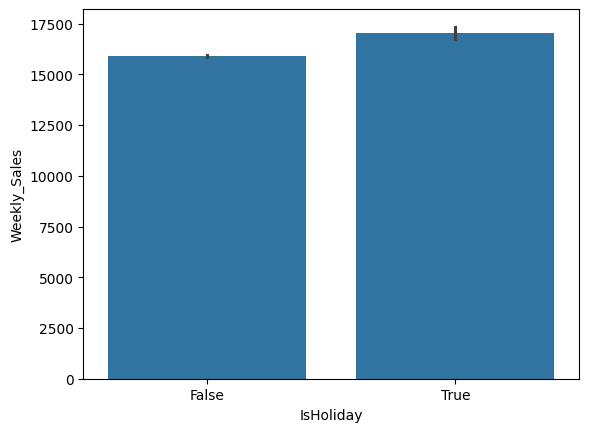

In [53]:
# WeeklySales per IsHoliday
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_merged)

Add comment

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

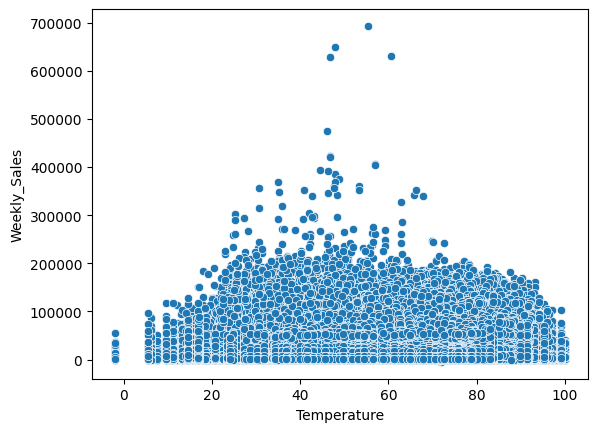

In [55]:
# WeeklySales per Temperature
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train_merged)

Add comment

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

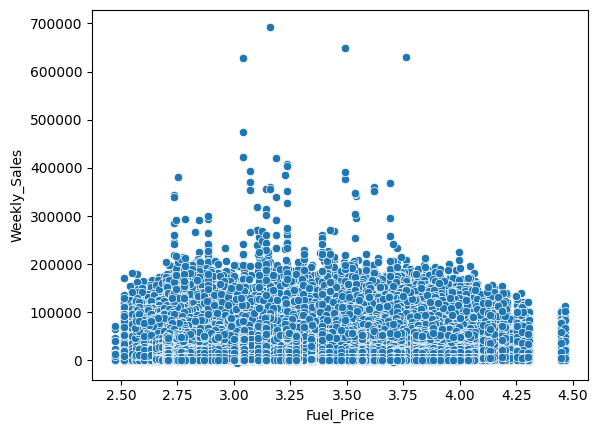

In [56]:
# WeeklySales per FuelPrice
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=train_merged)

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

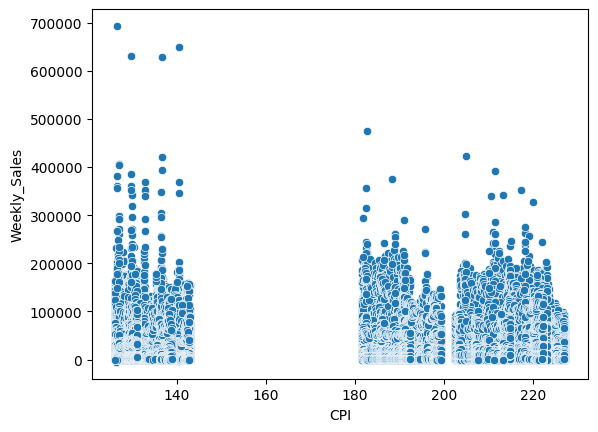

In [57]:
# WeeklySales per CPI
sns.scatterplot(x='CPI', y='Weekly_Sales', data=train_merged)

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

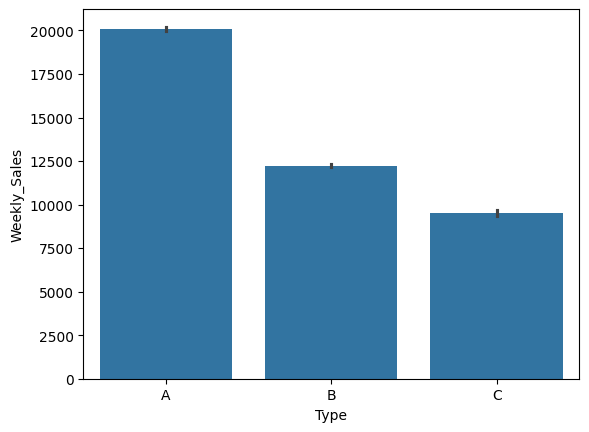

In [58]:
# WeeklySales per type (store)
sns.barplot(x='Type', y='Weekly_Sales', data=train_merged)

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

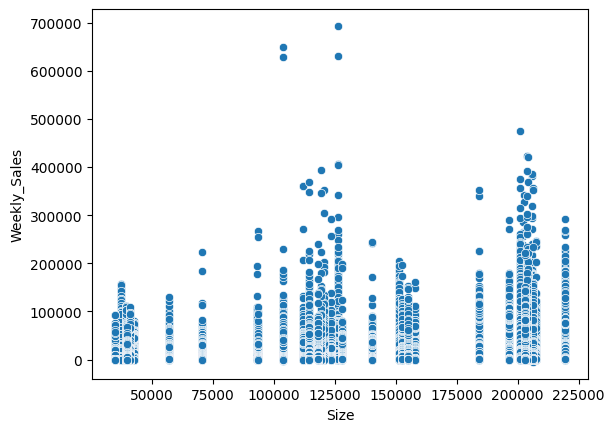

In [59]:
# WeeklySales per size (store)
sns.scatterplot(x='Size', y='Weekly_Sales', data=train_merged)

It seems that larger stores tend to have higher weekly sales.

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

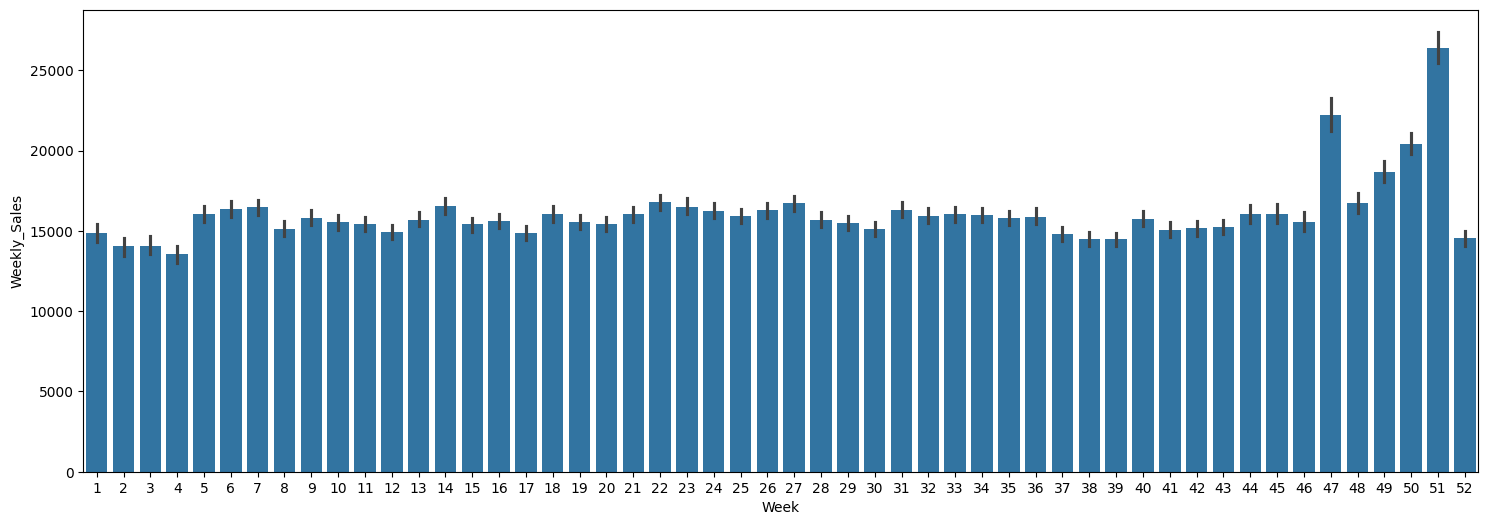

In [60]:
# weeklysales per week
plt.figure(figsize=(18, 6))
sns.barplot(x='Week', y='Weekly_Sales', data=train_merged)

Higher sales in the end of the year

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

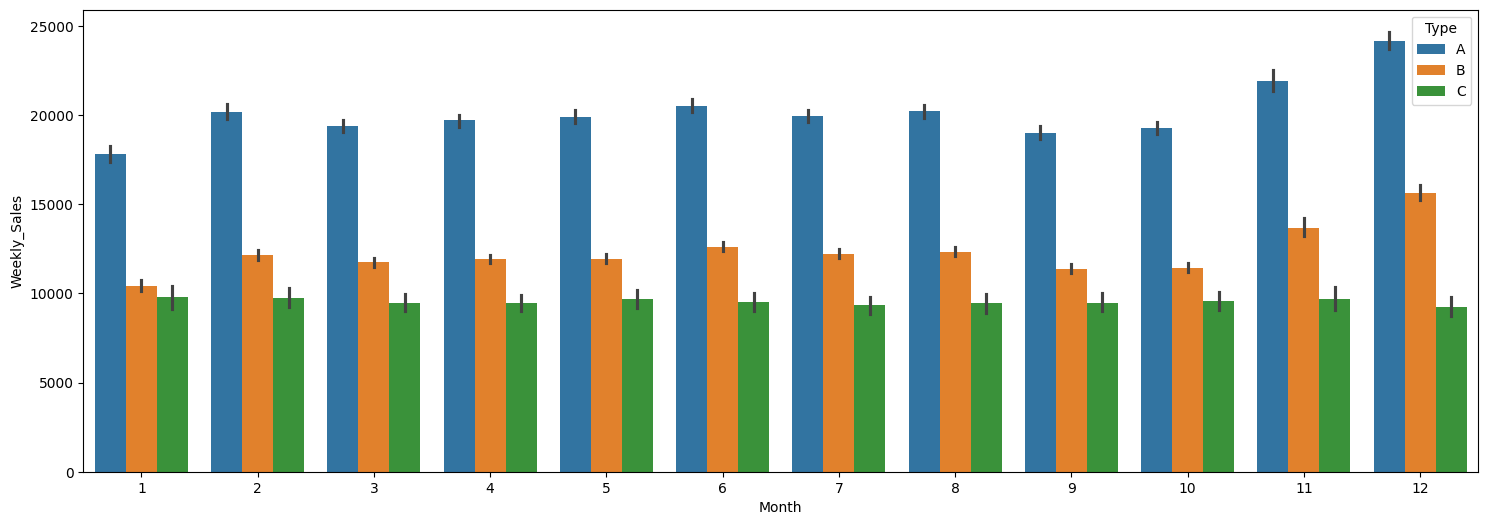

In [61]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Month', y='Weekly_Sales', data=train_merged, hue="Type")

As from previous graph last months has higher  weekly sales

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

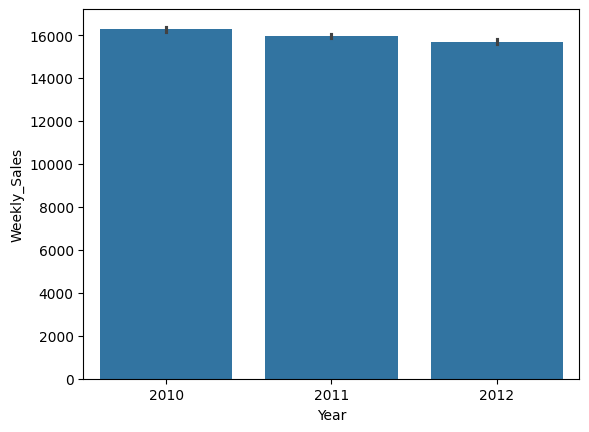

In [62]:
sns.barplot(x='Year', y='Weekly_Sales', data=train_merged)

Not detected big differences in weekly sales between years

#### Correlation calculation

In [63]:
# type is a categorical variable, calculate the mean Weekly_Sales for each Type to understand the relationship

type_sales_mean = train_merged.groupby('Type')['Weekly_Sales'].mean()

type_sales_mean

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

In [66]:
# or encode the different Type with one-hot encoding
# Label encode Type
train_merged['Type_encoded'] = train_merged['Type'].astype('category').cat.codes

# Calculate correlation
type_corr = train_merged[['Type_encoded', 'Weekly_Sales']].corr()

type_corr

,Type_encoded,Weekly_Sales
Type_encoded,1.000000,-0.182242
Weekly_Sales,-0.182242,1.000000


In [65]:
size_corr = train_merged[['Size', 'Weekly_Sales']].corr()
print(size_corr)


                  Size  Weekly_Sales
Size          1.000000      0.243828
Weekly_Sales  0.243828      1.000000
